### Setup:

In [236]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.signal as signal

In [225]:
trial1 = pd.read_csv('./pasco-data-march13/march13-1.csv')
trial2 = pd.read_csv('./pasco-data-march13/march13-2.csv')
trial3 = pd.read_csv('./pasco-data-march13/march13-3.csv')
trial1.head(5)

,Time (s) Run #1,Force (N) Run #1,Time (s) Run #2,Force (N) Run #2,Time (s) Run #3,Force (N) Run #3,Time (s) Run #4,Force (N) Run #4,Time (s) Run #5,Force (N) Run #5,Time (s) Run #6,Force (N) Run #6
0,0.0,1,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0
1,0.1,0,0.1,0,0.1,0,0.1,0,0.1,0,0.1,0
2,0.2,1,0.2,0,0.2,0,0.2,0,0.2,0,0.2,1
3,0.3,1,0.3,0,0.3,0,0.3,0,0.3,0,0.3,1
4,0.4,1,0.4,1,0.4,0,0.4,0,0.4,0,0.4,1


### 1. Plot all three trials to visualize:

In [226]:
# convolve to smooth signal
y1_1 = np.convolve(trial1['Force (N) Run #1'], np.ones(5)/5, mode='same')
y2_1 = np.convolve(trial1['Force (N) Run #2'], np.ones(5)/5, mode='same')
y3_1 = np.convolve(trial1['Force (N) Run #3'], np.ones(5)/5, mode='same')
y4_1 = np.convolve(trial1['Force (N) Run #4'], np.ones(5)/5, mode='same')
y5_1 = np.convolve(trial1['Force (N) Run #5'], np.ones(5)/5, mode='same')
y6_1 = np.convolve(trial1['Force (N) Run #6'], np.ones(5)/5, mode='same')

y1_2 = np.convolve(trial2['Force (N) Run #1'], np.ones(5)/5, mode='same')
y2_2 = np.convolve(trial2['Force (N) Run #2'], np.ones(5)/5, mode='same')
y3_2 = np.convolve(trial2['Force (N) Run #3'], np.ones(5)/5, mode='same')
y4_2 = np.convolve(trial2['Force (N) Run #4'], np.ones(5)/5, mode='same')
y5_2 = np.convolve(trial2['Force (N) Run #5'], np.ones(5)/5, mode='same')
y6_2 = np.convolve(trial2['Force (N) Run #6'], np.ones(5)/5, mode='same')

y1_3 = np.convolve(trial3['Force (N) Run #1'], np.ones(5)/5, mode='same')
y2_3 = np.convolve(trial3['Force (N) Run #2'], np.ones(5)/5, mode='same')
y3_3 = np.convolve(trial3['Force (N) Run #3'], np.ones(5)/5, mode='same')
y4_3 = np.convolve(trial3['Force (N) Run #4'], np.ones(5)/5, mode='same')
y5_3 = np.convolve(trial3['Force (N) Run #5'], np.ones(5)/5, mode='same')
y6_3 = np.convolve(trial3['Force (N) Run #6'], np.ones(5)/5, mode='same')

/var/folders/rx/5_fd7v5s5dbc3yr3cx7bw9m40000gn/T/ipykernel_48263/828656558.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


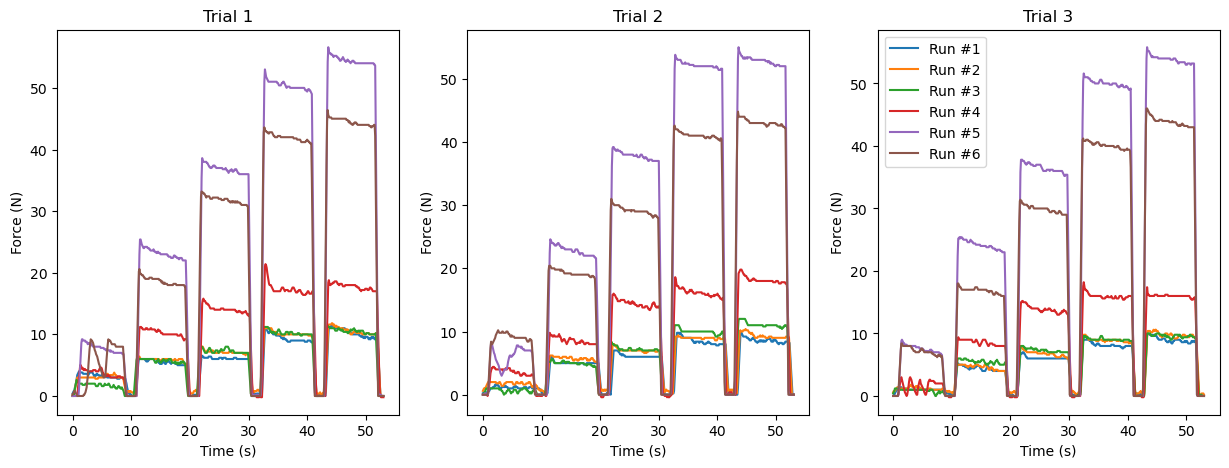

In [227]:
# visualize data
%matplotlib inline
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(15, 5))

ax1.plot(trial1['Time (s) Run #1'], y1_1, label='Run #1')
ax1.plot(trial1['Time (s) Run #2'], y2_1, label='Run #2')
ax1.plot(trial1['Time (s) Run #3'], y3_1, label='Run #3')
ax1.plot(trial1['Time (s) Run #4'], y4_1, label='Run #4')
ax1.plot(trial1['Time (s) Run #5'], y5_1, label='Run #5')
ax1.plot(trial1['Time (s) Run #6'], y6_1, label='Run #6')

ax2.plot(trial2['Time (s) Run #1'], y1_2, label='Run #1')
ax2.plot(trial2['Time (s) Run #2'], y2_2, label='Run #2')
ax2.plot(trial2['Time (s) Run #3'], y3_2, label='Run #3')
ax2.plot(trial2['Time (s) Run #4'], y4_2, label='Run #4')
ax2.plot(trial2['Time (s) Run #5'], y5_2, label='Run #5')
ax2.plot(trial2['Time (s) Run #6'], y6_2, label='Run #6')

ax3.plot(trial3['Time (s) Run #1'], y1_3, label='Run #1')
ax3.plot(trial3['Time (s) Run #2'], y2_3, label='Run #2')
ax3.plot(trial3['Time (s) Run #3'], y3_3, label='Run #3')
ax3.plot(trial3['Time (s) Run #4'], y4_3, label='Run #4')
ax3.plot(trial3['Time (s) Run #5'], y5_3, label='Run #5')
ax3.plot(trial3['Time (s) Run #6'], y6_3, label='Run #6')

ax1.set(title='Trial 1', xlabel='Time (s)', ylabel='Force (N)')
ax2.set(title='Trial 2', xlabel='Time (s)', ylabel='Force (N)')
ax3.set(title='Trial 3', xlabel='Time (s)', ylabel='Force (N)')
ax3.legend()
fig.show()

### 2. Average across trials and plot

In [228]:
# calculate average force
avg1 = np.mean((y1_1, y1_2, y1_3), axis=0)
avg2 = np.mean((y2_1, y2_2, y2_3), axis=0)
avg3 = np.mean((y3_1, y3_2, y3_3), axis=0)
avg4 = np.mean((y4_1, y4_2, y4_3), axis=0)
avg5 = np.mean((y5_1, y5_2, y5_3), axis=0)
avg6 = np.mean((y6_1, y6_2, y6_3), axis=0)

[Text(0.5, 1.0, 'Bladder Output Forces'),
 Text(0.5, 0, 'Time (s)'),
 Text(0, 0.5, 'Force (N)')]

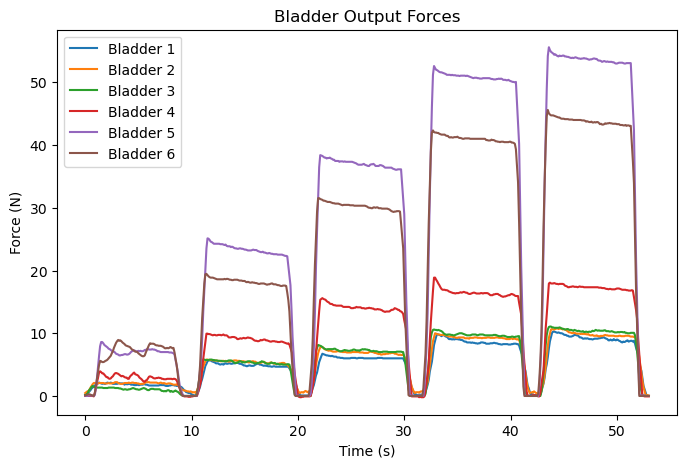

In [230]:
# plot average force
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(trial1['Time (s) Run #1'], avg1, label='Bladder 1')
ax.plot(trial1['Time (s) Run #2'], avg2, label='Bladder 2')
ax.plot(trial1['Time (s) Run #3'], avg3, label='Bladder 3')
ax.plot(trial1['Time (s) Run #4'], avg4, label='Bladder 4')
ax.plot(trial1['Time (s) Run #5'], avg5, label='Bladder 5')
ax.plot(trial1['Time (s) Run #6'], avg6, label='Bladder 6')
ax.legend()

ax.set(title='Bladder Output Forces', xlabel='Time (s)', ylabel='Force (N)')

In [302]:
# get indices of peaks (single point on left edge)
peak_1, props1 = signal.find_peaks(avg1, rel_height=2, distance=90)
peak_2, props2 = signal.find_peaks(avg2, rel_height=2, distance=90)
peak_3, props3 = signal.find_peaks(avg3, rel_height=2, distance=90)
print(peak_1)
print(peak_2)
print(peak_3)

peak_4, props4 = signal.find_peaks(avg4, rel_height=2, distance=90)
peak_5, props5 = signal.find_peaks(y5_3, rel_height=2, distance=80)
peak_6, props5 = signal.find_peaks(y6_3, rel_height=2, distance=90)
print(peak_4)
print(peak_5)
print(peak_6)

[ 21 117 223 331 441]
[  8 114 223 329 444]
[  7 111 219 328 437]
[ 14 114 223 328 437]
[ 15 116 219 325 433]
[ 14 110 217 324 432]


In [304]:
pw_1 = signal.peak_widths(avg1, peak_1, rel_height=1)
pw_2 = signal.peak_widths(avg2, peak_2, rel_height=1)
pw_3 = signal.peak_widths(avg3, peak_3, rel_height=1)
pw_4 = signal.peak_widths(avg4, peak_4, rel_height=1)
pw_5 = signal.peak_widths(y5_3, peak_5, rel_height=1)
pw_6 = signal.peak_widths(y6_3, peak_6, rel_height=1)
print(pw_1[0])
print(pw_2[0])
print(pw_3[0])
print(pw_4[0])
print(pw_5[0])
print(pw_6[0])

[100.5  99.   99.  321.  425. ]
[  2.33333333  98.         108.         108.         101.6       ]
[ 91.  94.  94. 101.  99.]
[ 85. 102. 111. 107.  99.]
[81. 91. 91. 93. 93.]
[81. 90. 92. 93. 94.]


KeyError: 549.0

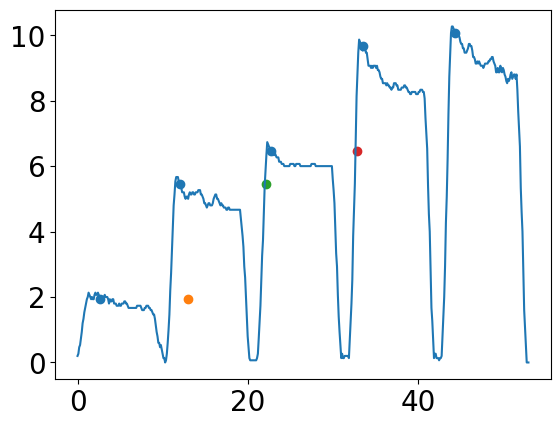

In [274]:
# visualize peaks
%matplotlib inline

plt.plot(trial1['Time (s) Run #1'], avg1)
plt.scatter(trial1['Time (s) Run #2'][peak_1], avg1[peak_1])

for i in range(len(pw_1)):
    plt.scatter(trial1['Time (s) Run #2'][pw_1[0][i]+int(peak_1[i])], avg1[peak_1][i], label='widths')

# plt.scatter(trial1['Time (s) Run #1'][pw_1[0]], avg1[pw_1[0]], label='widths')

In [306]:
# get average value over each peak:
bar_values_1 = np.zeros(len(peak_1))
bar_values_2 = np.zeros(len(peak_2))
bar_values_3 = np.zeros(len(peak_3))
bar_values_4 = np.zeros(len(peak_4))
bar_values_5 = np.zeros(len(peak_5))
bar_values_6 = np.zeros(len(peak_6))
for idx, peak in enumerate(peak_5):
    bar_values_1[idx] = np.mean(avg1[peak:peak+int(pw_1[0][idx])])
    bar_values_2[idx] = np.mean(avg2[peak:peak+int(pw_2[0][idx])])
    bar_values_3[idx] = np.mean(avg3[peak:peak+int(pw_3[0][idx])])
    bar_values_4[idx] = np.mean(avg4[peak:peak+int(pw_4[0][idx])])
    bar_values_5[idx] = np.mean(y5_3[peak:peak+int(pw_5[0][idx])])
    bar_values_6[idx] = np.mean(y6_3[peak:peak+int(pw_6[0][idx])])

print(bar_values_1)
print(bar_values_2)
print(bar_values_3)
print(bar_values_4)
print(bar_values_5)
print(bar_values_6)

[1.70133333 4.11919192 5.2976431  7.68802589 8.30612245]
[2.06666667 4.5585034  5.84938272 7.72654321 8.91836735]
[0.87619048 4.52411348 6.47375887 8.40330033 9.25782313]
[ 2.59686275  7.35098039 11.64804805 13.46853583 15.34761905]
[ 6.64197531 20.36483516 32.43076923 44.64301075 48.03870968]
[ 6.3037037  14.15777778 25.94782609 35.59354839 38.71276596]


In [307]:
# get standard deviation of each peak
std_dev_1 = np.zeros(len(peak_1))
std_dev_2 = np.zeros(len(peak_2))
std_dev_3 = np.zeros(len(peak_3))
std_dev_4 = np.zeros(len(peak_4))
std_dev_5 = np.zeros(len(peak_5))
std_dev_6 = np.zeros(len(peak_6))

for idx, peak in enumerate(peak_5):
    std_dev_1[idx] = np.std(avg1[peak:peak+int(pw_1[0][idx])])
    std_dev_2[idx] = np.std(avg2[peak:peak+int(pw_2[0][idx])])
    std_dev_3[idx] = np.std(avg3[peak:peak+int(pw_3[0][idx])])
    std_dev_4[idx] = np.std(avg4[peak:peak+int(pw_4[0][idx])])
    std_dev_5[idx] = np.std(y5_3[peak:peak+int(pw_5[0][idx])])
    std_dev_6[idx] = np.std(y6_3[peak:peak+int(pw_6[0][idx])])

### 4. Plot Force vs. Area

Text(0, 0.5, 'Max Force (N)')

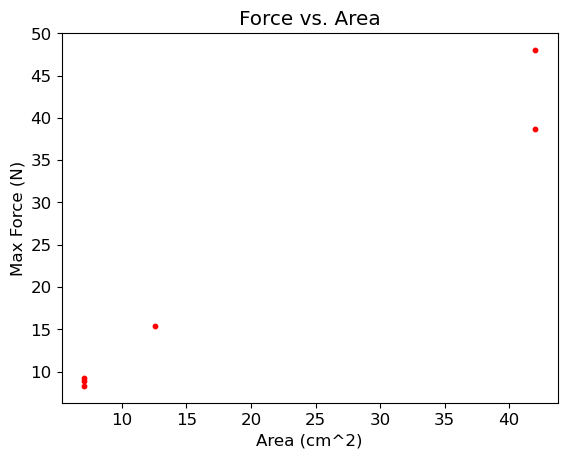

In [315]:
%matplotlib inline
# plotting params:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)

areas = [7.07, 7.07, 7.07, 12.56, 42, 42]
max_force = (max(bar_values_1), max(bar_values_2), max(bar_values_3), max(bar_values_4), max(bar_values_5), max(bar_values_6))
plt.scatter(areas, max_force, s=10, marker='o', color='r')
plt.title('Force vs. Area')
plt.xlabel('Area (cm^2)')
plt.ylabel('Max Force (N)')

### Poster Plot:

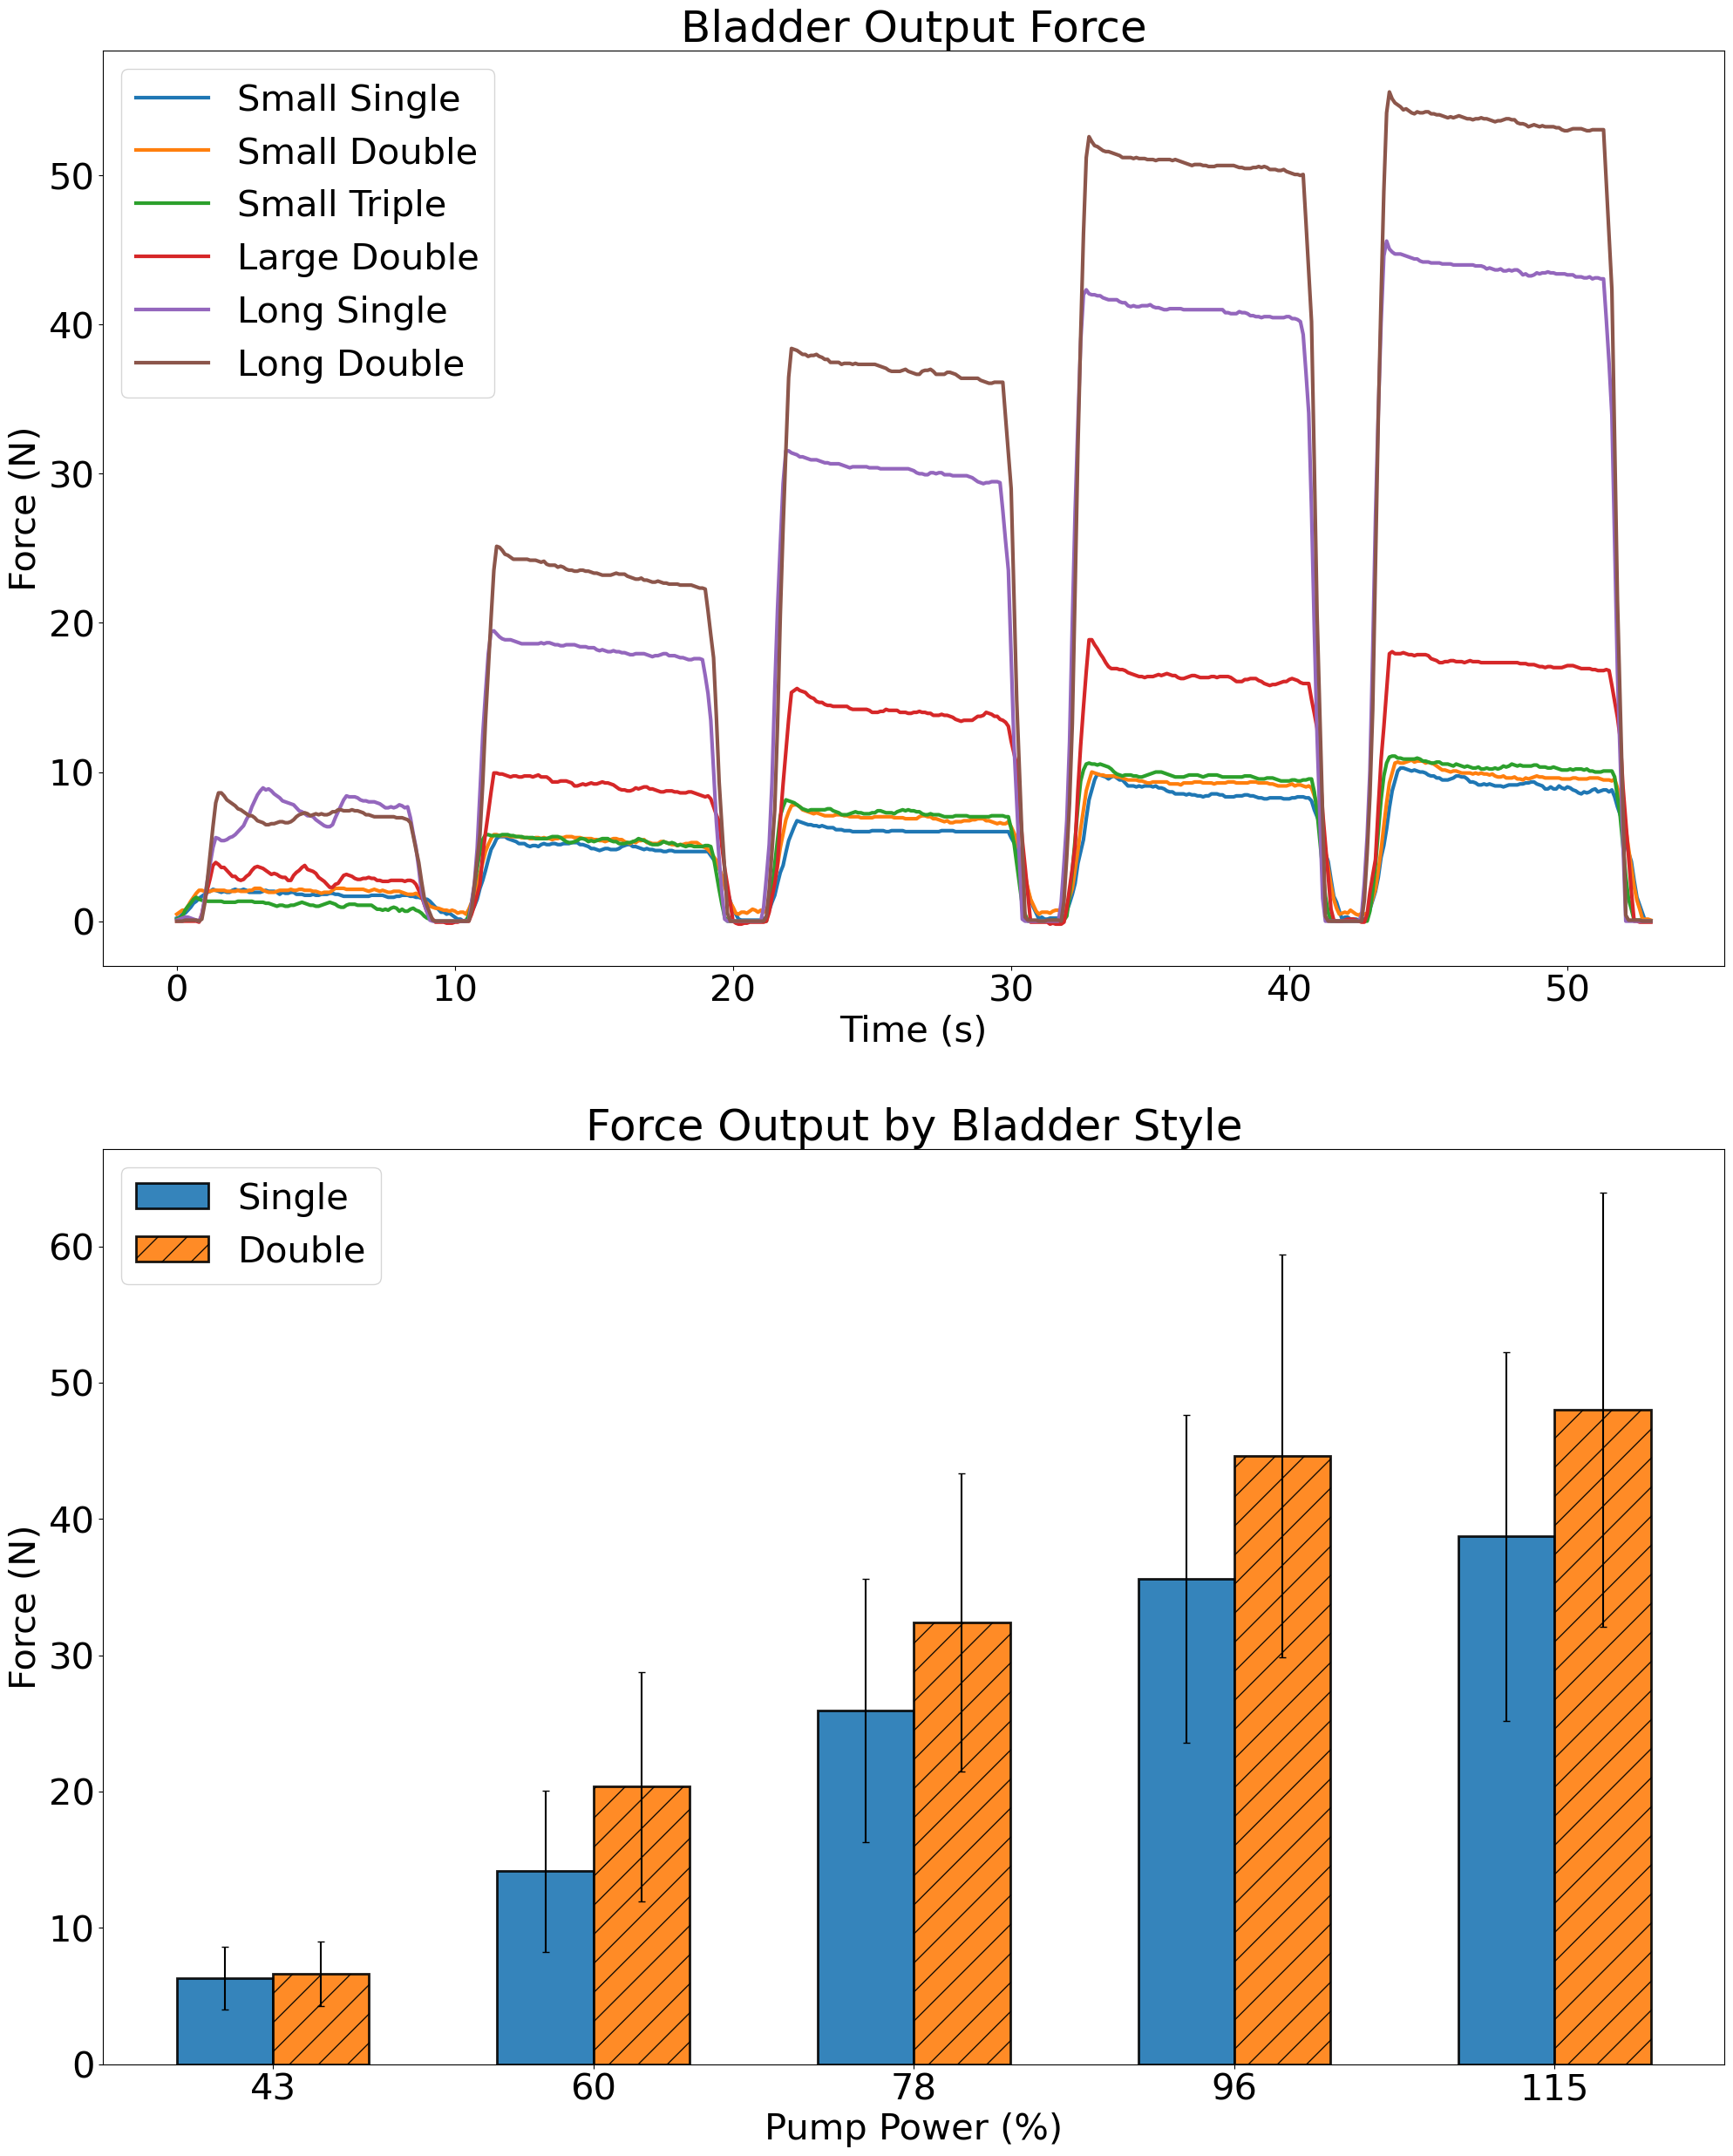

In [297]:
%matplotlib inline
# plotting parameters:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 30}
matplotlib.rc('font', **font)
w = 0.3
n = np.arange(len(peak_5))
xticks = [43, 60, 78, 96, 115]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 30))

ax1.plot(trial1['Time (s) Run #1'], avg1, label='Small Single', linewidth=3)
ax1.plot(trial1['Time (s) Run #2'], avg2, label='Small Double', linewidth=3)
ax1.plot(trial1['Time (s) Run #3'], avg3, label='Small Triple', linewidth=3)
ax1.plot(trial1['Time (s) Run #4'], avg4, label='Large Double', linewidth=3)
ax1.plot(trial1['Time (s) Run #6'], avg6, label='Long Single', linewidth=3)
ax1.plot(trial1['Time (s) Run #5'], avg5, label='Long Double', linewidth=3)
ax1.legend()
ax1.set(title='Bladder Output Force', xlabel='Time (s)', ylabel='Force (N)')

ax2.bar(n-w/2, bar_values_6, width=w, label='Single', yerr=std_dev_6, capsize=3, alpha=0.9, edgecolor='black', linewidth=2)
ax2.bar(n+w/2, bar_values_5, width=w, label='Double', yerr=std_dev_5, capsize=3, alpha=0.9, edgecolor='black', hatch='/', linewidth=2)
ax2.set(title='Force Output by Bladder Style', xlabel='Pump Power (%)', ylabel='Force (N)')
ax2.set_xticks(n, xticks)
ax2.legend(loc='best')

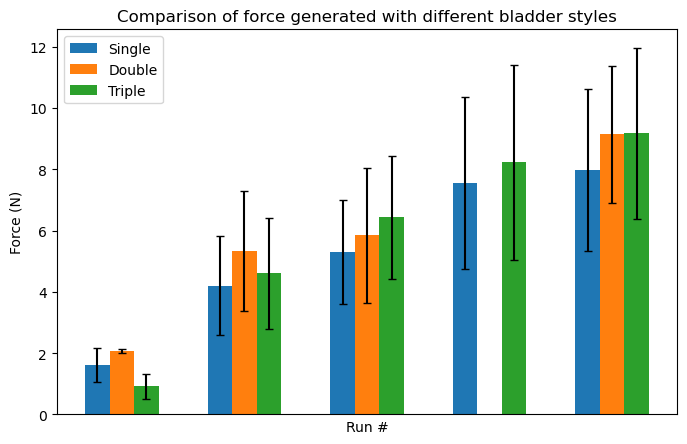

In [156]:
%matplotlib inline
# plotting parameters:
w = 0.2
n = np.arange(0, len(peak_5), 1)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.bar(n, bar_values_1, width=w, label='Single', yerr=std_dev_1, capsize=3)
ax.bar(n+w, bar_values_2, width=w, label='Double', yerr=std_dev_2, capsize=3)
ax.bar(n+2*w, bar_values_3, width=w, label='Triple', yerr=std_dev_3, capsize=3)
ax.set(title='Comparison of force generated with different bladder styles', xlabel='Run #', ylabel='Force (N)')
ax.set_xticks([])
ax.legend(loc='best')